In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
# Choose a start date and end date of the trip. Make sure that your vacation range is approximately 3-15 days total.
date_entry = input('Enter a start date for your trip in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
trip_start_date = dt.date(year, month, day)

date_entry = input('Enter an end date for your trip in YYYY-MM-DD format: ')
year, month, day = map(int, date_entry.split('-'))
trip_end_date = dt.date(year, month, day)

Enter a start date for your trip in YYYY-MM-DD format: 2017-11-20
Enter an end date for your trip in YYYY-MM-DD format: 2017-11-26


In [7]:
date_entry

'2017-11-26'

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Display the row's columns and data in dictionary format for measurement table
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1149b3198>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [14]:
# Display the row's columns and data in dictionary format for station table
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1149b3cf8>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [214]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
date_year_ago = trip_end_date - dt.timedelta(365)

#pcp_year = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date <= end_date,
#                                                                        Measurement.date >= year_ago)).all()
#precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= trip_end_date, Measurement.date >= date_year_ago)).\
#       group_by(Measurement.date).all()

precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= trip_end_date, Measurement.date >= date_year_ago).\
                group_by(Measurement.date).all()
precipitation

[('2016-11-26', 0.05),
 ('2016-11-27', 0.0),
 ('2016-11-28', 0.01),
 ('2016-11-29', 0.0),
 ('2016-11-30', 0.14),
 ('2016-12-01', 0.12),
 ('2016-12-02', 0.03),
 ('2016-12-03', 0.0),
 ('2016-12-04', 0.03),
 ('2016-12-05', 0.43),
 ('2016-12-06', 0.02),
 ('2016-12-07', 0.0),
 ('2016-12-08', 0.03),
 ('2016-12-09', 0.52),
 ('2016-12-10', 0.05),
 ('2016-12-11', 0.04),
 ('2016-12-12', 0.01),
 ('2016-12-13', 0.05),
 ('2016-12-14', 0.03),
 ('2016-12-15', 0.0),
 ('2016-12-16', 0.0),
 ('2016-12-17', 0.01),
 ('2016-12-18', 0.13),
 ('2016-12-19', 0.01),
 ('2016-12-20', 0.0),
 ('2016-12-21', 0.0),
 ('2016-12-22', 0.01),
 ('2016-12-23', 0.01),
 ('2016-12-24', 0.01),
 ('2016-12-25', 0.0),
 ('2016-12-26', 0.02),
 ('2016-12-27', 0.0),
 ('2016-12-28', 0.02),
 ('2016-12-29', 0.04),
 ('2016-12-30', 0.12),
 ('2016-12-31', 0.01),
 ('2017-01-01', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('201

In [17]:
# Create Dataframe for precipitation
precipitation_df = pd.DataFrame(precipitation, columns=["date", "precipitation"])
precipitation_df.set_index('date', inplace=True)
precipitation_df.sort_values(by='date')
precipitation_df.head()

,precipitation
date,
2016-11-26,0.05
2016-11-27,0.00
2016-11-28,0.01
2016-11-29,0.00
2016-11-30,0.14


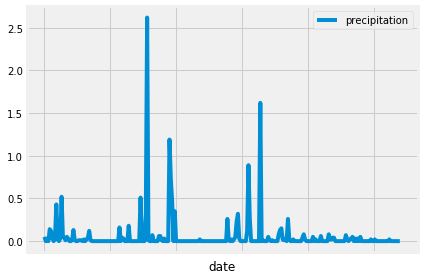

In [18]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the dataframe as a chart using pandas plotting
#precipitation_df.iloc[::-1].plot(title="Precipitation from %s to %s" % (year_ago, end_date))
precipitation_df.plot()
plt.tight_layout()
plt.show()

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

In [19]:
precipitation_df.describe()

,precipitation
count,271.000000
mean,0.052583
std,0.221595
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


![describe](Images/describe.png)

In [20]:
# Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Station.station).count()
number_of_stations

9

In [198]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [21]:
stations_counts = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Station that has the highest number of observations
most_active = stations_counts[0][0]
number_of_observations = stations_counts[0][1]
print('The most active station is {} with {} obrservations'.format(most_active, number_of_observations))

The most active station is USC00519281 with 2772 obrservations


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


[(54.0, 85.0, 71.66378066378067)]

In [23]:
temperature_most_active = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()
temperature_most_active

[(54.0, 85.0, 71.66378066378067)]

In [194]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [24]:
#last12_temp = session.query(Measurement.date, Measurement.tobs).filter(and_(Measurement.date <= trip_end_date,
#                                                                        Measurement.date >= date_year_ago,
#                                                                         Measurement.station == most_active)).all()

last12_tobs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= date_year_ago, Measurement.station == most_active).all()

# create the dataframe and set date as the index
last12_tobs_df = pd.DataFrame(last12_tobs, columns = ['date', 'tobs'])
last12_tobs_df.head()

,date,tobs
0,2016-11-26,75.0
1,2016-11-27,73.0
2,2016-11-28,75.0
3,2016-11-29,73.0
4,2016-11-30,73.0


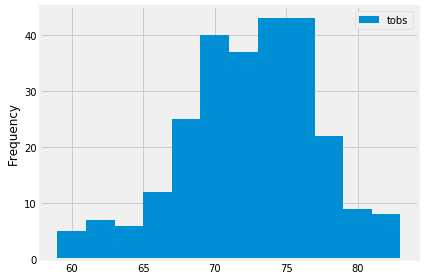

In [25]:
#plt.hist(last12_tobs_df['tobs'], bins=12)
#plt.tight_layout()
#plt.show()
last12_tobs_df.iloc[::-1].plot.hist(bins = 12)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [41]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


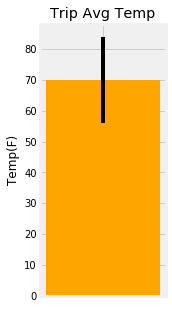

[(62.0, 69.91666666666667, 76.0)]


In [105]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
     trip_temp = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
     tmin = trip_temp[0][0]                     
     tavg = trip_temp[0][1]
     tmax = trip_temp[0][2]
     plt.figure(figsize=(2,5))
     plt.bar(1, tavg, yerr= tmax - tmin, tick_label="", color ='orange')
     plt.title('Trip Avg Temp')
     plt.ylabel('Temp(F)')
     plt.show()
     return trip_temp

print(calc_temps('2016-01-01', '2016-01-08'))

#trip_temp_df = pd.DataFrame(trip_temp, colums = [tmin])

# def calc_temps(start_date, end_date):
#  def calc_temps(start_date, end_date):
#     trip_dates = session.query(Measurements.date, Measurements.tobs).filter(Measurements.date >= start_date,\
#          Measurements.date <= end_date).all()
#     trip_dates_df = pd.DataFrame(trip_dates)
#     max_temp = trip_dates_df["tobs"].max()
#     min_temp = trip_dates_df["tobs"].min()
#     mean_temp = trip_dates_df["tobs"].mean()
#     plt.figure(figsize=(2,5))
#     plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
#     plt.show()
# calc_temps("2017-08-03", "2017-08-19")



In [67]:
trip_temp

In [172]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)




In [111]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

total_prcp = session.query(Measurement.station, func.sum(Measurement.prcp)).group_by(Measurement.station).all()
print(total_prcp)
#total_prcp_df = pd.DataFrame(total_prcp, columns=["Station", "Total Precipitation from %s to %s" % (date_year_ago, trip_end_date)])
#total_prcp_df.head(number_of_stations)

[('USC00511918', 92.68000000000006), ('USC00513117', 382.61999999999847), ('USC00514830', 234.49000000000026), ('USC00516128', 1068.0899999999956), ('USC00517948', 43.44000000000002), ('USC00518838', 70.87000000000005), ('USC00519281', 588.6399999999976), ('USC00519397', 131.62000000000063), ('USC00519523', 295.67999999999944)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


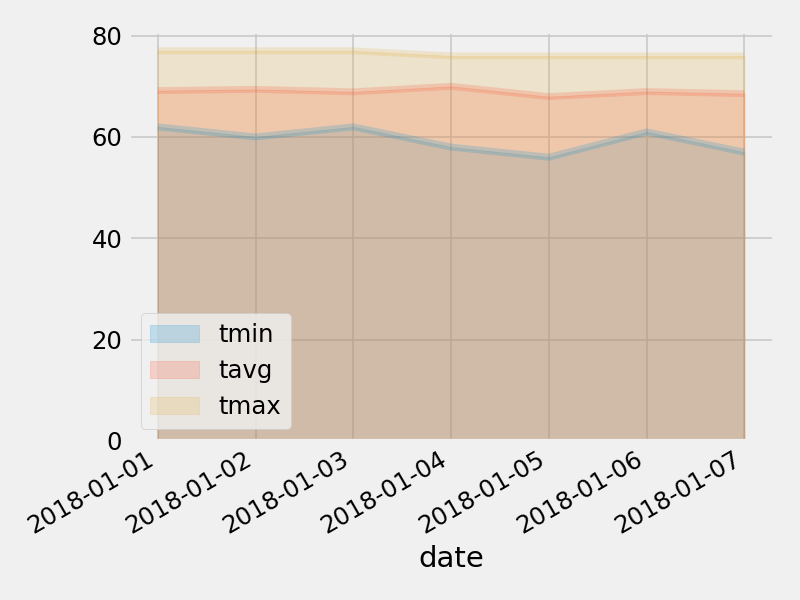

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
